# Aggregate extraced time across multiple traces

1. Input parameters: directory with JSON traces, trace name pattern, (multiple) event patterns.  
   a. In trace name pattern include the varying parameter value (MBS).
2. For each event pattern, extract event time from all traces one by one using parseOneTrace script.
3. Aggregate values into one DF along with the varying parameter value extracted from the trace filename.


In [143]:
import os
import pandas as pd
import subprocess
import re
import matplotlib
import math
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator

### Functions

In [141]:
# Plot grid on the axis ax
def drawGrid(ax, xstep=10, ystep=None, minor_ticks_x=5., minor_ticks_y=5.):
    # ax.set_xlim(0, None)
    # ax.set_ylim(0, None)
    minorLocatorX = MultipleLocator(xstep / minor_ticks_x)
    majorLocatorX = MultipleLocator(xstep)
    ax.xaxis.set_major_locator(majorLocatorX)
    ax.xaxis.set_minor_locator(minorLocatorX)
    if ystep is not None:
        minorLocatorY = MultipleLocator(ystep / minor_ticks_y)
        majorLocatorY = MultipleLocator(ystep)
        ax.yaxis.set_minor_locator(minorLocatorY)
        ax.yaxis.set_major_locator(majorLocatorY)
    ax.grid(ls=":", lw=.5, alpha=0.8, color="grey")
    ax.grid(which='minor', ls=':', lw=.2, alpha=.8, color='grey')

## Set input parameters

In [2]:
logdir = 'logs/DL.cont/traces/20200803'
trace_name_pattern = 'nsys_trace_([0-9]+).json'
event_patterns = ['.*prediction.*','.*WD pass.*', '.*optimizer update.*', '.*iteration.*']

## Read trace files

In [3]:
list_command = "ls -1 " + logdir
files = []
param_values = []
proc = subprocess.Popen(list_command.split(" "),
                        stdout=subprocess.PIPE,
                        stderr=subprocess.STDOUT,
                        encoding='utf8')
for line in iter(proc.stdout.readline, ''):
    line = line.strip(" \n")
    m = re.match(trace_name_pattern, line)
    if m:
        files.append(os.path.abspath(os.path.join(logdir, line)))
        param_values.append(m.group(1))

print('{} files in {}'.format(len(files), logdir))
print(tuple(zip(files,param_values)))

20 files in logs/DL.cont/traces/20200803
(('/host/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_10.json', '10'), ('/host/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_11.json', '11'), ('/host/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_12.json', '12'), ('/host/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_13.json', '13'), ('/host/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_14.json', '14'), ('/host/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_15.json', '15'), ('/host/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_16.json', '16'), ('/host/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_17.json', '17'), ('/host/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_18.json', '18'), ('/host/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_19.json', '19'), ('/host/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_20.json', '20'), ('/host/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_21.

In [4]:
results = None
# Set to True to parse JSON traces saving results in a CSV
parse_json_traces=True
for param, tracefile in zip(param_values, files):
    events = ' '.join(event_patterns)
    if parse_json_traces:
        # Run
        # python3 parseOneTrace.py -f $tracefile --events $events
        command = 'python3 parseOneTrace.py -f {} --events {}'.format(tracefile, events)
        print(command)
        p = subprocess.run(command.split(' '), stdout=subprocess.PIPE, stderr=subprocess.PIPE,
                           bufsize=0, shell=False)
        if p.returncode == 0:
            if p.stdout:
                print(p.stdout.decode('utf-8'))
            print('Finished OK')
        else:        
            print(p.stdout.decode('utf-8'))
            print('ERROR')
            print(p.stderr.decode('utf-8'))
    # Read data from CSV file
    directory = os.path.dirname(tracefile)
    csvfile = ('').join(os.path.basename(
        tracefile).split('.')[:-1])  # Filename without extension
    csvfile = csvfile + '.csv'
    csvfile = os.path.join(directory, csvfile)
    print('Reading {}'.format(csvfile))    
    df_ = pd.read_csv(csvfile)
    df_['param'] = param
#     display(df_.head())
    if results is None:
        results = df_
    else:
        results = results.append(df_, ignore_index=True)
        
results.sample(n=8)

python3 parseOneTrace.py -f /host/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_10.json --events .*prediction.* .*WD pass.* .*optimizer update.* .*iteration.*
Extracting data from a JSON trace file. v.0.05.
Reading /host/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_10.json
Read 13054 rows from /host/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_10.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
280   59.0            59.0  ...  1.734937  5.354982
2210  34.0            34.0  ...  5.356086       NaN
2211  34.0            34.0  ...  5.356093       NaN
2219  59.0            59.0  ...  5.571515  5.718184
2229  59.0            59.0  ...  5.573157  5.645112

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0   [Called from Java]
Searching names ...
Matched Events:
       type    

Extracting data from a JSON trace file. v.0.05.
Reading /host/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_12.json
Read 13100 rows from /host/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_12.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
290   59.0            59.0  ...  1.831852  5.547112
2220  34.0            34.0  ...  5.548355       NaN
2221  34.0            34.0  ...  5.548367       NaN
2224  59.0            59.0  ...  5.777608  5.955529
2234  59.0            59.0  ...  5.779518  5.858098

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0   [Called from Java]
Searching names ...
Matched Events:
       type     id                                              value
14   String   14.0  QUADD_CUDA_CONFIG=/tmp/injection_config_596096...
16   String   16.0  LOGNAME=peter USER=peter

Extracting data from a JSON trace file. v.0.05.
Reading /host/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_14.json
Read 13112 rows from /host/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_14.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
289   59.0            59.0  ...  1.839513  5.486924
2219  34.0            34.0  ...  5.487912       NaN
2220  34.0            34.0  ...  5.487919       NaN
2225  59.0            59.0  ...  5.732542  5.892350
2235  59.0            59.0  ...  5.734933  5.801889

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0   [Called from Java]
Searching names ...
Matched Events:
       type     id                                              value
14   String   14.0  QUADD_CUDA_CONFIG=/tmp/injection_config_dda58f...
16   String   16.0  LOGNAME=peter USER=peter

Extracting data from a JSON trace file. v.0.05.
Reading /host/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_16.json
Read 13131 rows from /host/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_16.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
287   59.0            59.0  ...  1.728491  5.383270
2217  34.0            34.0  ...  5.384325       NaN
2218  34.0            34.0  ...  5.384332       NaN
2228  59.0            59.0  ...  5.652300  5.826508
2238  59.0            59.0  ...  5.654479  5.725759

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0   [Called from Java]
Searching names ...
Matched Events:
       type     id                                              value
14   String   14.0  QUADD_CUDA_CONFIG=/tmp/injection_config_1ed446...
16   String   16.0  LOGNAME=peter USER=peter

Extracting data from a JSON trace file. v.0.05.
Reading /host/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_18.json
Read 13131 rows from /host/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_18.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
284   59.0            59.0  ...  1.785170  5.530751
2214  34.0            34.0  ...  5.531851       NaN
2215  34.0            34.0  ...  5.531870       NaN
2220  59.0            59.0  ...  5.780945  6.003238
2230  59.0            59.0  ...  5.783440  5.862889

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0   [Called from Java]
Searching names ...
Matched Events:
       type     id                                              value
16   String   16.0  QUADD_CUDA_CONFIG=/tmp/injection_config_35af4f...
18   String   18.0  LOGNAME=peter USER=peter

Extracting data from a JSON trace file. v.0.05.
Reading /host/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_20.json
Read 13134 rows from /host/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_20.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
287   59.0            59.0  ...  1.808673  5.535899
2217  34.0            34.0  ...  5.536977       NaN
2218  34.0            34.0  ...  5.536983       NaN
2225  59.0            59.0  ...  5.900168  6.125082
2235  59.0            59.0  ...  5.902569  5.987051

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0   [Called from Java]
Searching names ...
Matched Events:
       type     id                                              value
14   String   14.0  QUADD_CUDA_CONFIG=/tmp/injection_config_1d9c0f...
16   String   16.0  LOGNAME=peter USER=peter

Extracting data from a JSON trace file. v.0.05.
Reading /host/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_22.json
Read 13135 rows from /host/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_22.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
286   59.0            59.0  ...  1.737916  5.488050
2216  34.0            34.0  ...  5.489069       NaN
2217  34.0            34.0  ...  5.489076       NaN
2224  59.0            59.0  ...  5.791548  6.032620
2234  59.0            59.0  ...  5.794313  5.877408

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0   [Called from Java]
Searching names ...
Matched Events:
       type     id                                              value
14   String   14.0  QUADD_CUDA_CONFIG=/tmp/injection_config_bf586a...
16   String   16.0  LOGNAME=peter USER=peter

Extracting data from a JSON trace file. v.0.05.
Reading /host/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_24.json
Read 13136 rows from /host/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_24.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
287   59.0            59.0  ...  1.830744  5.487400
2217  34.0            34.0  ...  5.488674       NaN
2218  34.0            34.0  ...  5.488687       NaN
2225  59.0            59.0  ...  5.852853  6.067861
2235  59.0            59.0  ...  5.855138  5.929398

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0   [Called from Java]
Searching names ...
Matched Events:
       type     id                                              value
14   String   14.0  QUADD_CUDA_CONFIG=/tmp/injection_config_289994...
18   String   18.0  LOGNAME=peter USER=peter

Extracting data from a JSON trace file. v.0.05.
Reading /host/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_6.json
Read 13094 rows from /host/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_6.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
288   59.0            59.0  ...  1.876081  5.556121
2218  34.0            34.0  ...  5.557109       NaN
2219  34.0            34.0  ...  5.557116       NaN
2224  59.0            59.0  ...  5.736084  5.856991
2234  59.0            59.0  ...  5.738210  5.796263

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0   [Called from Java]
Searching names ...
Matched Events:
       type     id                                              value
14   String   14.0  QUADD_CUDA_CONFIG=/tmp/injection_config_08ee38...
16   String   16.0  LOGNAME=peter USER=peter P

Extracting data from a JSON trace file. v.0.05.
Reading /host/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_8.json
Read 13019 rows from /host/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_8.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
282   59.0            59.0  ...  1.776610  5.422650
2212  34.0            34.0  ...  5.423635       NaN
2213  34.0            34.0  ...  5.423641       NaN
2223  59.0            59.0  ...  5.620893  5.742891
2233  59.0            59.0  ...  5.622906  5.680746

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0   [Called from Java]
Searching names ...
Matched Events:
       type     id                                              value
14   String   14.0  QUADD_CUDA_CONFIG=/tmp/injection_config_227847...
16   String   16.0  LOGNAME=peter USER=peter P

,name,NVTX,duration,GPU side,param
581,Prediction and loss,Iteration 1,0.000373,True,8
573,Optimizer update,Iteration 3,0.004280,True,7
207,Prediction and loss,Iteration 2,0.000049,True,16
417,Iteration 1,NaN,0.252369,True,23
36,Prediction and loss,Iteration 1,0.000820,False,11
211,Optimizer update,Iteration 2,0.004146,True,16
30,Iteration 4,NaN,0.591332,False,10
180,Iteration 3,NaN,0.136296,False,15


In [10]:
# Check duplicate name-nvtx-gpuside-mbs combinations
times = results.copy()
times.rename({'param':'mini-batch size'},axis=1, inplace=True)
print('Events:', times['name'].unique())
print('NVTX events:', times['NVTX'].unique())
# Count duplicate entries
times_ = times.groupby(['NVTX', 'name', 'GPU side', 'mini-batch size'],
                       as_index=False).count()
print('duplicate name-nvtx-gpuside-mbs combinations')
display(times_[times_['duration'] > 1])

Events: ['Iteration 1' 'FWD pass' 'Prediction and loss' 'BWD pass'
 'Optimizer update' 'Iteration 2' 'Iteration 3' 'Iteration 4']
NVTX events: [nan 'Iteration 1' 'Iteration 2' 'Iteration 3']
duplicate name-nvtx-gpuside-mbs combinations


,NVTX,name,GPU side,mini-batch size,duration


In [19]:
def extractIteration(s):
    s = s.replace('Iteration','')
    try:
        x = int(s)
    except:
        print('Cannot convert to int {}.'.format(s))
        return None
    return x

In [37]:
# Time of CPU-side NVTX iterations per MBS
df_ = results.copy()
df_ = df_[df_['name'].str.lower().str.contains('iteration')]
df_['iteration'] = df_['name'].apply(extractIteration)
df_['param'] = df_['param'].astype(int)
df_.rename({'param':'mini-batch size'},axis=1,inplace=True)
df_ = df_[df_['iteration'] != 4]
df_cpu = df_[df_['GPU side']==False].copy()
df_gpu = df_[df_['GPU side']==True].copy()
display(df_gpu.head())
df_cpu = df_cpu.pivot_table(index='mini-batch size', columns = 'iteration', values = 'duration')
df_cpu.sort_index(inplace=True)
df_gpu = df_gpu.pivot_table(index='mini-batch size', columns = 'iteration', values = 'duration')
df_gpu.sort_index(inplace=True)
df_gpu.tail()

,name,NVTX,duration,GPU side,mini-batch size,iteration
1,Iteration 1,NaN,0.136936,True,10,1
11,Iteration 2,NaN,0.102754,True,10,2
21,Iteration 3,NaN,0.102471,True,10,3
33,Iteration 1,NaN,0.142722,True,11,1
43,Iteration 2,NaN,0.115921,True,11,2


iteration,1,2,3
mini-batch size,,,
21,0.224999,0.190786,0.185434
22,0.233075,0.198123,0.193136
23,0.252369,0.210834,0.197664
24,0.209200,0.216460,0.212322
25,0.255246,0.224123,0.216149


Text(0.5, 1.0, 'GPU')

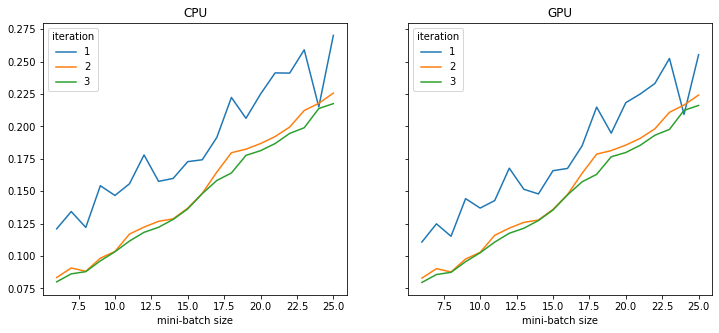

In [40]:
fig,axs = plt.subplots(1,2,figsize=(12,5),sharey=True)
ax = axs[0]
df_cpu.plot(ax=ax)
ax.set_title('CPU')
ax = axs[1]
df_gpu.plot(ax=ax)
ax.set_title('GPU')

In [121]:
# Filter rows by iteration
# Return True if the row belongs to one of the iteration numbers
# from iteratilns parameter.
def filterIterations(row,iterations):
    s = row['NVTX']
    if type(s)==float and math.isnan(s):
        s = row['name']
    s = s.replace('Iteration','')
    try:
        x = int(s)
    except:
        print('Cannot convert to int {}.'.format(s))
        return None
    if x in iterations:
#         print('{} is in {}'.format(s, iterations))
        return True
    return False
        

In [129]:
# Time of iterations (use CPU-side 2 and 3), CPU-side FWD/BWD pass, loss and prediction and optimizer updates
df_ = results.copy()
df_ = df_[df_.apply(filterIterations,axis=1,iterations=[2,3])]
df_['param'] = df_['param'].astype(int)
df_.rename({'param':'mini-batch size'},axis=1,inplace=True)

df_gpu = df_[df_['GPU side'] == True]
df_cpu = df_[df_['GPU side'] == False]
df_cpu.head()

,name,NVTX,duration,GPU side,mini-batch size
10,Iteration 2,NaN,0.103419,False,10
12,FWD pass,Iteration 2,0.028305,False,10
14,Prediction and loss,Iteration 2,0.000343,False,10
16,BWD pass,Iteration 2,0.030390,False,10
18,Optimizer update,Iteration 2,0.021293,False,10


In [130]:
def aggregateAndPivot(df):
    df_ = df.copy()
    df_ = df_.pivot_table(index='mini-batch size', columns = 'name', values = 'duration', aggfunc=np.mean)
    df_['training operations'] = df_['FWD pass'] + df_['BWD pass'] + df_['Optimizer update'] + df_['Prediction and loss']
    df_.sort_index(inplace=True)
    return df_

    
df_cpu = aggregateAndPivot(df_cpu)
df_gpu = aggregateAndPivot(df_gpu)
display(df_cpu.head())
display(df_gpu.head())

name,BWD pass,FWD pass,Iteration 2,Iteration 3,Optimizer update,Prediction and loss,training operations
mini-batch size,,,,,,,
6,0.032094,0.024026,0.083347,0.080026,0.019545,0.000280,0.075946
7,0.031842,0.023108,0.090711,0.086169,0.019326,0.000284,0.074560
8,0.029953,0.019426,0.088156,0.087884,0.014293,0.000236,0.063908
9,0.033028,0.028731,0.098275,0.096193,0.022739,0.000435,0.084934
10,0.030298,0.026832,0.103419,0.103221,0.019936,0.000337,0.077403


name,BWD pass,FWD pass,Iteration 2,Iteration 3,Optimizer update,Prediction and loss,training operations
mini-batch size,,,,,,,
6,0.048164,0.024170,0.082899,0.079555,0.004441,0.000090,0.076864
7,0.052922,0.025971,0.090195,0.085669,0.004396,0.000056,0.083345
8,0.053153,0.027018,0.087632,0.087368,0.004138,0.000049,0.084358
9,0.058318,0.029138,0.097655,0.095570,0.004142,0.000114,0.091711
10,0.063290,0.030541,0.102754,0.102471,0.004138,0.000049,0.098017


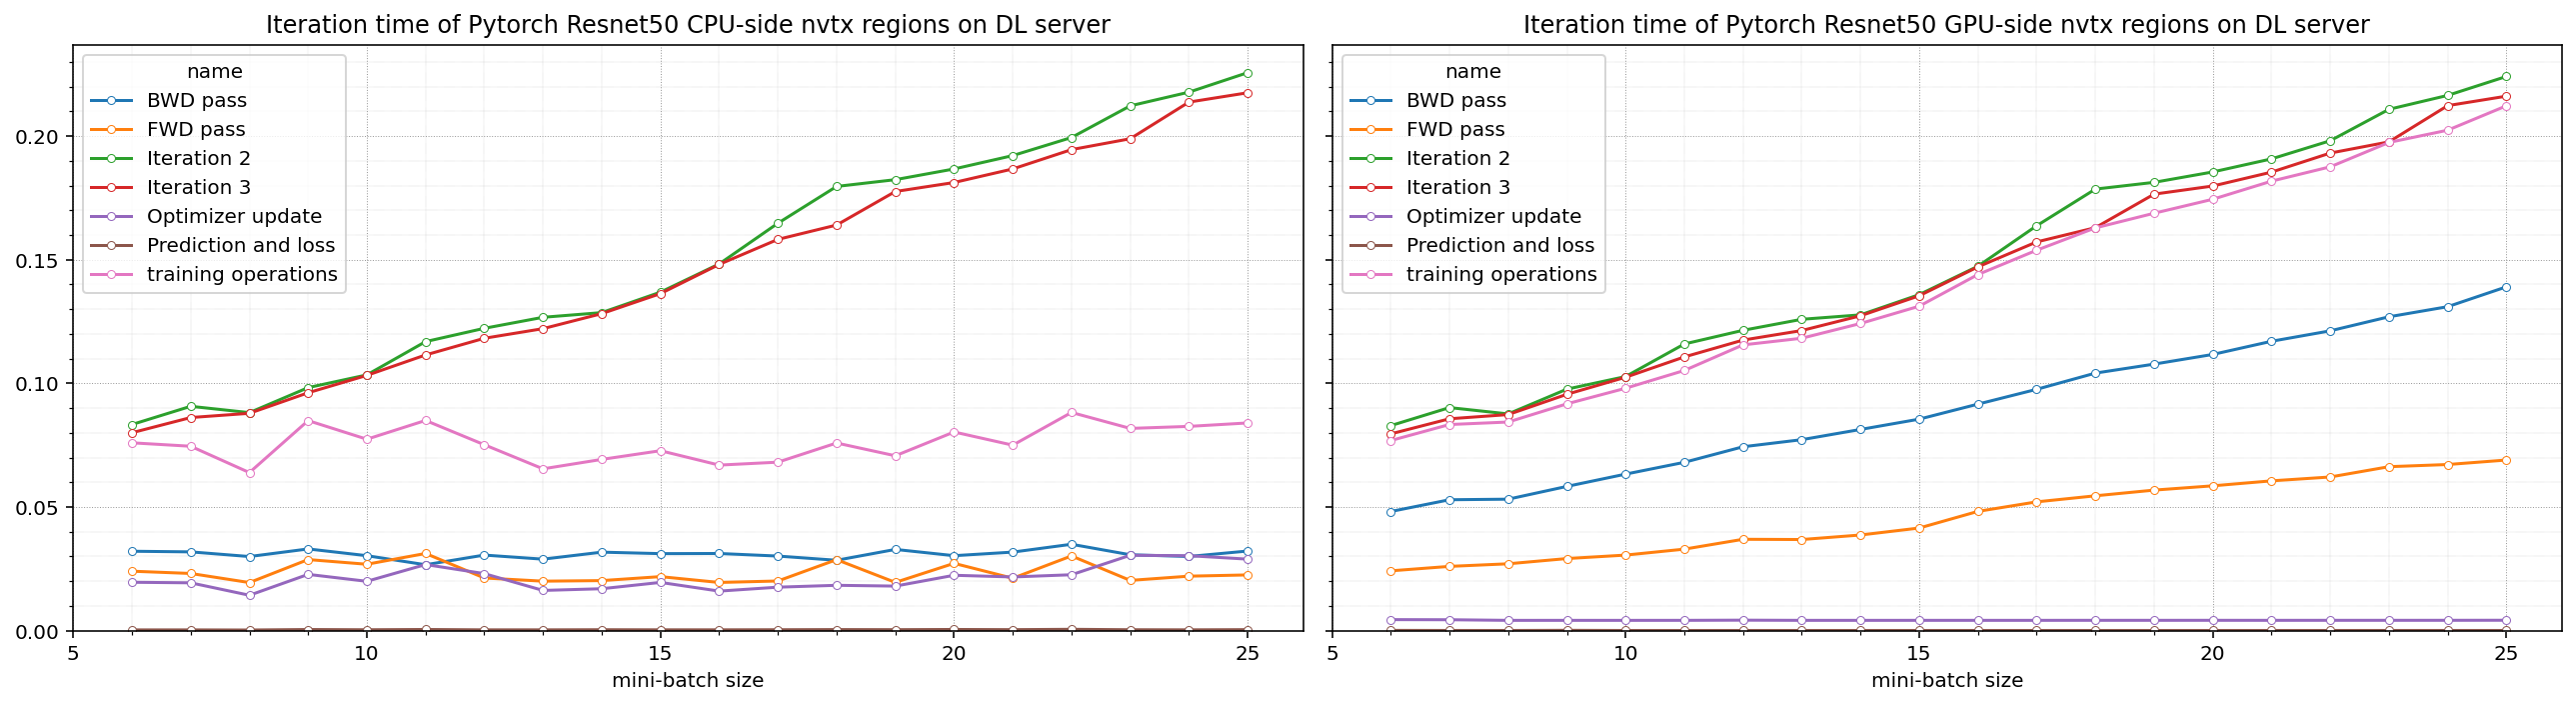

In [149]:
fig,axs = plt.subplots(1,2,figsize=(18,5),dpi=144,sharey=True)
plt.minorticks_on()
ax = axs[0]
df_cpu.plot(marker='o',ms=4,mfc='w',mew=0.5,ax=ax)
ax.set_title('Iteration time of Pytorch Resnet50 CPU-side nvtx regions on DL server')
drawGrid(ax,xstep=5)
ax.set_xlim(5,None)
ax.set_ylim(0,None)
ax = axs[1]
df_gpu.plot(marker='o',ms=4,mfc='w',mew=0.5,ax=ax)
ax.set_title('Iteration time of Pytorch Resnet50 GPU-side nvtx regions on DL server')
drawGrid(ax,xstep=5)
ax.set_xlim(5,None)
ax.set_ylim(0,None)
plt.tight_layout()

API event,cublasSgemmStridedBatched,cublasSgemm_v2,cudnnBatchNormalizationBackwardEx,cudnnBatchNormalizationForwardTrainingEx,cudnnConvolutionBackwardData,cudnnConvolutionBackwardFilter,cudnnConvolutionForward
param,,,,,,,
21,0.004711,0.000214,0.017202,0.010403,0.037096,0.043923,0.037344
22,0.004798,0.000214,0.018016,0.010847,0.038128,0.045564,0.037897
23,0.005319,0.000228,0.018994,0.011508,0.042132,0.049807,0.042715
24,0.005065,0.000215,0.019596,0.011747,0.040848,0.049199,0.040739
25,0.006330,0.000220,0.020414,0.012188,0.045346,0.051045,0.041555


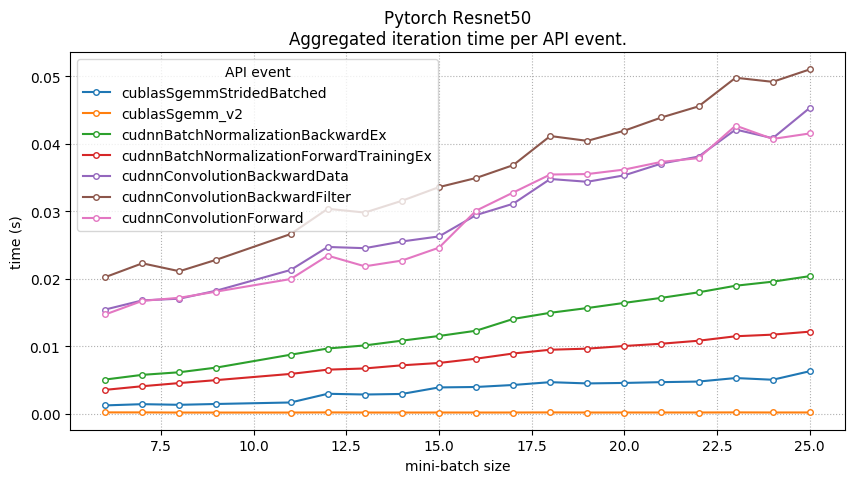

In [7]:
timesT = times.pivot_table(columns='API event', index='param', values='duration',aggfunc='sum')
# Use MBS 5-40
timesT = timesT.loc[:40]
display(timesT.tail())
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
timesT.plot(marker='o', ms=4, mfc='w', ax=ax)
ax.grid(ls=':', which='major')
ax.grid(ls=':', lw=0.5, which='minor')
ax.set_xlabel('mini-batch size')
ax.set_ylabel('time (s)')
plt.title('Pytorch Resnet50\nAggregated iteration time per API event.')
plt.show()

In [16]:
# Group API events by type
def getType(e):
    types = {'FC': 'sgemm_v2',
             'conv': 'conv',
             'BN': 'batchnormalization'}
    for k, v in types.items():
        m = re.search(v, e.lower())
        if m is not None:
            return k
    return 'other'

In [17]:
# Sum time for same type events
times['type'] = times['API event'].apply(getType)
times = times[(times['type'] != 'other') & (times['param'] != 50)]
times = times.groupby(['type', 'param'], as_index=False).sum()
times['param'] = times['param'].astype(int)
times.head()
times.sample(n=7)

,type,param,iteration,duration
6,BN,12,6,0.034357
12,FC,6,3,0.000419
30,conv,20,9,0.214981
9,BN,30,6,0.084773
21,FC,40,3,0.000663
17,FC,12,3,0.000453
20,FC,30,3,0.000463


In [18]:
timesT = times.pivot_table(columns='type', index='param', values='duration')
timesT.head()

type,BN,FC,conv
param,,,
5,0.017407,0.000460,0.084629
6,0.017144,0.000419,0.081668
7,0.019659,0.000418,0.091030
8,0.023046,0.000419,0.100493
9,0.025450,0.000424,0.110049


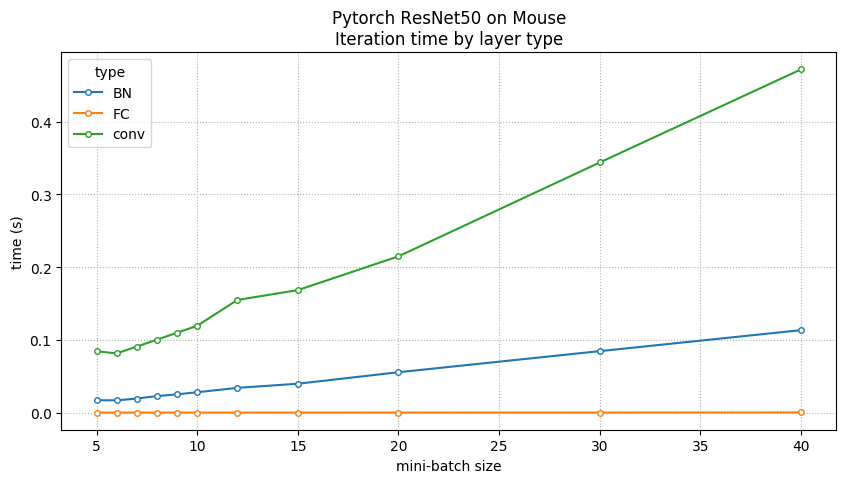

In [19]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
timesT.plot(marker='o', ms=4, mfc='w', ax=ax)
ax.grid(ls=':', which='major')
ax.grid(ls=':', lw=0.5, which='minor')
ax.set_xlabel('mini-batch size')
ax.set_ylabel('time (s)')
plt.title('Pytorch ResNet50 on Mouse\nIteration time by layer type')
plt.show()